In [1]:
## import Matpolt with PyQt4 Backend
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import decomposition

import sys
sys.path.append('./..')
from tf_model.linear_regression import LinearRegression

In [3]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
print(boston.keys())
print("Header : ", boston.feature_names) 
print("Target : ", boston.target[0:5])  ## Price

dict_keys(['DESCR', 'feature_names', 'data', 'target'])
Header :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Target :  [ 24.   21.6  34.7  33.4  36.2]


In [5]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
boston_df.shape

(506, 13)

In [7]:
# Only Use : crim + chas + nox + rm + dis + ptratio + black + lstat
boston_df.drop(['ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'B'], axis=1, inplace=True)
boston_df.shape

# Normalize
boston_df_norm = (boston_df - boston_df.mean()) / (boston_df.max() - boston_df.min())

In [8]:
# Split Training , Test Data

train_X = boston_df_norm[:-50].astype("float32")
train_Y = boston.target[:-50].astype("float32")
test_X = boston_df_norm[-50:].astype("float32")
test_Y = boston.target[-50:].astype("float32")

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(456, 6)
(456,)
(50, 6)
(50,)


In [9]:
# df => ndarray
train_X = train_X.values
test_X = test_X.values

In [12]:
lm = LinearRegression()
lm.train(train_X, train_Y, learning_rate=0.1, num_iters=2000, batch_size=50, verbose=True)

Epoch: 0050  loss=136.111847
Epoch: 0100  loss=70.372253
Epoch: 0150  loss=47.722019
Epoch: 0200  loss=39.658218
Epoch: 0250  loss=35.666199
Epoch: 0300  loss=33.502155
Epoch: 0350  loss=31.776449
Epoch: 0400  loss=30.430561
Epoch: 0450  loss=29.226570
Epoch: 0500  loss=28.150496
Epoch: 0550  loss=27.174706
Epoch: 0600  loss=26.287636
Epoch: 0650  loss=25.433046
Epoch: 0700  loss=24.678818
Epoch: 0750  loss=24.031525
Epoch: 0800  loss=23.416092
Epoch: 0850  loss=22.831747
Epoch: 0900  loss=22.336617
Epoch: 0950  loss=21.878466
Epoch: 1000  loss=21.382273
Epoch: 1050  loss=20.931885
Epoch: 1100  loss=20.544447
Epoch: 1150  loss=20.152121
Epoch: 1200  loss=19.810654
Epoch: 1250  loss=19.508549
Epoch: 1300  loss=19.222216
Epoch: 1350  loss=18.958950
Epoch: 1400  loss=18.736689
Epoch: 1450  loss=18.499863
Epoch: 1500  loss=18.255573
Epoch: 1550  loss=18.051630
Epoch: 1600  loss=17.850775
Epoch: 1650  loss=17.656710
Epoch: 1700  loss=17.486759
Epoch: 1750  loss=17.331678
Epoch: 1800  loss=1

In [13]:
pred_Y = []
for i in range(test_X.shape[0]):
    pred_Y.append(lm.predict(test_X[i]))

In [14]:
# X Feature => 1D
pca = decomposition.PCA(n_components=1)
pca.fit(test_X)
test_X_1d = pca.transform(test_X)

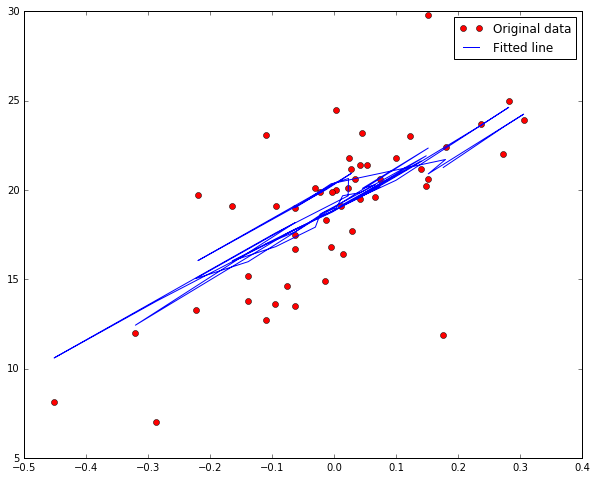

In [15]:
plt.plot(test_X_1d, test_Y, 'ro', label='Original data')
plt.plot(test_X_1d, pred_Y, label='Fitted line')
plt.legend()
plt.show()